In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('santander.csv')
df.head()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...   
1                      0.0                      0.0  ...   
2                      0.0                      0.0  ...   
3                      0.0                      0.0  ...   
4                      0.0                      0.0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3          var38  TARGET  
0                     0.0                     0.0   39205.170000       0  
1                     0.0                     0.0   49278.030000       0  
2                     0.0                     0.0   67333.770000       0  
3                     0.0                     0.0   64007.970000       0  
4                     0.0                     0.0  117310.979016       0  

[5 rows x 371 columns]

In [3]:
df.shape

(76020, 371)

In [4]:
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']

In [5]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['TARGET'], axis=1), df['TARGET'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((53214, 370), (22806, 370))

# Feature selection with Variance Threshold

Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [6]:
from sklearn.feature_selection import VarianceThreshold

In [7]:
# applying variance threshold

var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [8]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [9]:
sum(var_thres.get_support())

332

In [10]:
# Lets Find non-constant features 
len(X_train.columns[var_thres.get_support()])

332

In [11]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

38


In [12]:
for column in constant_columns:
    print(column)

ind_var2_0
ind_var2
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var41
ind_var46_0
ind_var46
num_var27_0
num_var28_0
num_var28
num_var27
num_var41
num_var46_0
num_var46
saldo_var28
saldo_var27
saldo_var41
saldo_var46
delta_imp_reemb_var33_1y3
delta_num_reemb_var33_1y3
imp_amort_var18_hace3
imp_amort_var34_hace3
imp_reemb_var13_hace3
imp_reemb_var33_hace3
imp_reemb_var33_ult1
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
num_var2_0_ult1
num_var2_ult1
num_reemb_var13_hace3
num_reemb_var33_hace3
num_reemb_var33_ult1
num_trasp_var17_out_hace3
num_trasp_var33_out_hace3
saldo_var2_ult1
saldo_medio_var13_medio_hace3


In [13]:
X_train.drop(constant_columns,axis=1)

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
7526    15083     2     23                 0.0                     0.00   
51929  103706     2     48                 0.0                     0.00   
46677   93351     2     40                 0.0                     0.00   
46194   92424     2     83                 0.0                     0.00   
20190   40437     2     79                 0.0                   535.41   
...       ...   ...    ...                 ...                      ...   
21243   42533    53     46                 0.0                  1770.48   
45891   91801     2     29                 0.0                     0.00   
42613   85345     9     23                 0.0                     0.00   
43567   87270     2     30                60.0                    72.48   
68268  136296     2     55                 0.0                     0.00   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
7526                      0.00                     0.00   
51929                     0.00                     0.00   
46677                     0.00                     0.00   
46194                     0.00                     0.00   
20190                   535.41                     0.00   
...                        ...                      ...   
21243                  2669.46                   451.74   
45891                     0.00                     0.00   
42613                     0.00                     0.00   
43567                    95.64                     0.00   
68268                     0.00                     0.00   

       imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  \
7526                      0.00                      0.0   
51929                     0.00                      0.0   
46677                     0.00                      0.0   
46194                     0.00                      0.0   
20190                     0.00                      0.0   
...                        ...                      ...   
21243                   808.77                      0.0   
45891                     0.00                      0.0   
42613                     0.00                      0.0   
43567                     0.00                      0.0   
68268                     0.00                      0.0   

       imp_op_var40_efect_ult3  ...  saldo_medio_var29_ult3  \
7526                       0.0  ...                     0.0   
51929                      0.0  ...                     0.0   
46677                      0.0  ...                     0.0   
46194                      0.0  ...                     0.0   
20190                      0.0  ...                     0.0   
...                        ...  ...                     ...   
21243                      0.0  ...                     0.0   
45891                      0.0  ...                     0.0   
42613                      0.0  ...                     0.0   
43567                      0.0  ...                     0.0   
68268                      0.0  ...                     0.0   

       saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
7526                       0.0                      0.0   
51929                      0.0                      0.0   
46677                      0.0                      0.0   
46194                      0.0                      0.0   
20190                      0.0                      0.0   
...                        ...                      ...   
21243                      0.0                      0.0   
45891                      0.0                      0.0   
42613                      0.0                      0.0   
43567                      0.0                      0.0   
68268                      0.0                      0.0   

       saldo_medio_var33_ult1  saldo_medio_var33_ult3  \
7526                      0.0                     0.0   
51929                     0.0                     0.0   
46677                     0.0                     0.0  

# Feature Selection- With Correlation

In [14]:
from sklearn.datasets import load_boston

In [15]:
#Loading the dataset
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"] = data.target

In [16]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [17]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [18]:
X = df.drop("MEDV",axis=1) 
y = df["MEDV"]

In [19]:
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [20]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [21]:
import seaborn as sns

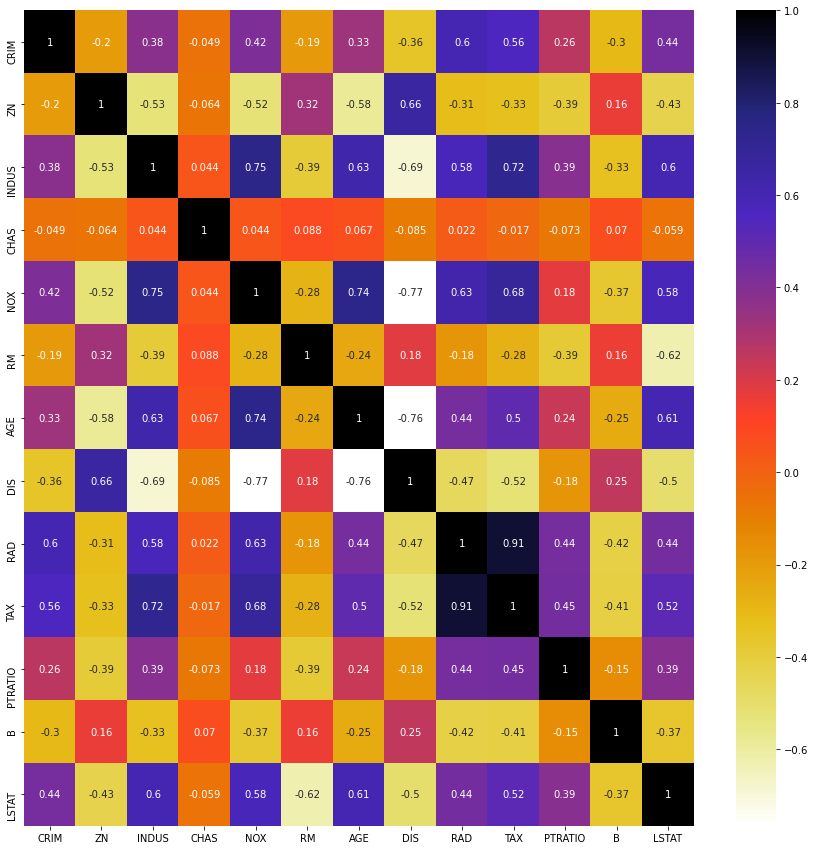

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15,15))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [23]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
# the 'abs' function is converting the negative correlated features to positive, so if there is any high -ve correlated feature , that is also getting removed
# to keep the -ve correlated features, we can simply remove the 'abs' function while using

In [24]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

4

In [25]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [26]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

CRIM   ZN  INDUS  CHAS     RM   RAD  PTRATIO       B  LSTAT
329   0.06724  0.0   3.24   0.0  6.333   4.0     16.9  375.21   7.34
371   9.23230  0.0  18.10   0.0  6.216  24.0     20.2  366.15   9.53
219   0.11425  0.0  13.89   1.0  6.373   5.0     16.4  393.74  10.50
403  24.80170  0.0  18.10   0.0  5.349  24.0     20.2  396.90  19.77
78    0.05646  0.0  12.83   0.0  6.232   5.0     18.7  386.40  12.34
..        ...  ...    ...   ...    ...   ...      ...     ...    ...
4     0.06905  0.0   2.18   0.0  7.147   3.0     18.7  396.90   5.33
428   7.36711  0.0  18.10   0.0  6.193  24.0     20.2   96.73  21.52
385  16.81180  0.0  18.10   0.0  5.277  24.0     20.2  396.90  30.81
308   0.49298  0.0   9.90   0.0  6.635   4.0     18.4  396.90   4.54
5     0.02985  0.0   2.18   0.0  6.430   3.0     18.7  394.12   5.21

[152 rows x 9 columns]

# Using it with the Santander dataset

In [27]:
df=pd.read_csv('santander.csv',nrows=10000)
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=0)

<AxesSubplot:>

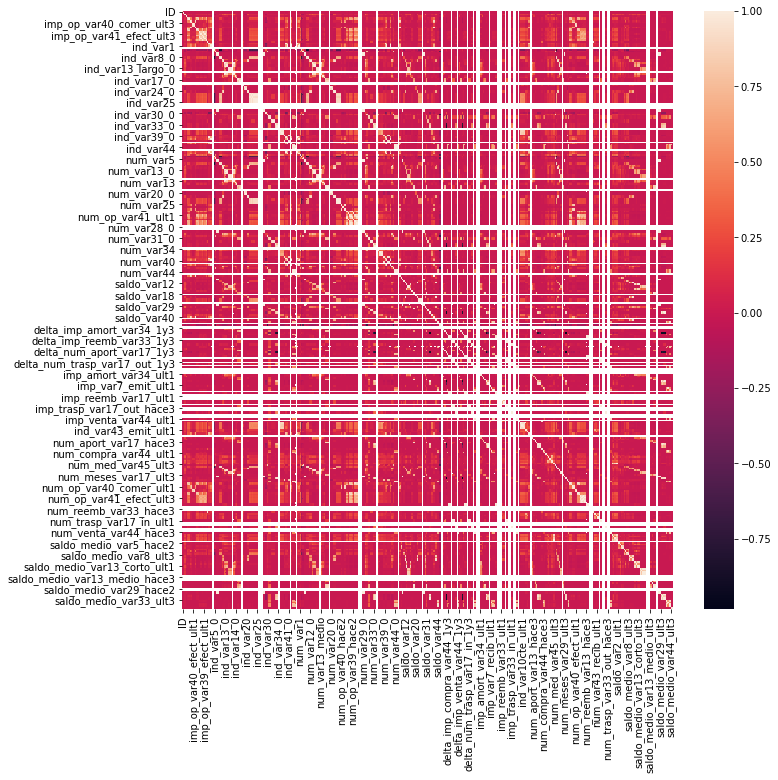

In [28]:
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [29]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

156

In [30]:
corr_features

{'delta_imp_aport_var33_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var20',
 'ind_var24',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var31',
 'ind_var32',
 'ind_var32_0',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var6',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_aport_

In [31]:
X_train= X_train.drop(corr_features,axis=1)

In [32]:
X_train.head()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
7681  15431     2     42               840.0                  4477.02   
9031  18181     2     31                 0.0                    52.32   
3691   7411     2     51                 0.0                     0.00   
202     407     2     36                 0.0                     0.00   
5625  11280     2     23                 0.0                     0.00   

      imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
7681                  4989.54                      0.0   
9031                    52.32                      0.0   
3691                     0.00                      0.0   
202                      0.00                      0.0   
5625                     0.00                      0.0   

      imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  \
7681                      0.0                        0   
9031                      0.0                        0   
3691                      0.0                        0   
202                       0.0                        0   
5625                      0.0                        0   

      imp_op_var41_comer_ult1  ...  saldo_medio_var13_medio_hace2  \
7681                  4477.02  ...                              0   
9031                    52.32  ...                              0   
3691                     0.00  ...                              0   
202                      0.00  ...                              0   
5625                     0.00  ...                              0   

      saldo_medio_var13_medio_hace3  saldo_medio_var13_medio_ult1  \
7681                              0                             0   
9031                              0                             0   
3691                              0                             0   
202                               0                             0   
5625                              0                             0   

      saldo_medio_var13_medio_ult3  saldo_medio_var17_hace2  \
7681                             0                      0.0   
9031                             0                      0.0   
3691                             0                      0.0   
202                              0                      0.0   
5625                             0                      0.0   

      saldo_medio_var17_hace3  saldo_medio_var29_hace2  \
7681                      0.0                      0.0   
9031                      0.0                      0.0   
3691                      0.0                      0.0   
202                       0.0                      0.0   
5625                      0.0                      0.0   

      saldo_medio_var29_hace3  saldo_medio_var44_hace2      var38  
7681                        0                      0.0   37491.21  
9031                        0                      0.0  106685.94  
3691                        0                      0.0   66144.66  
202                         0                      0.0   92121.36  
5625                        0                      0.0   74650.83  

[5 rows x 214 columns]

#  Feature Selection- With Mutual information In Classification

### Mutual Information

MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

**I(X ; Y) = H(X) – H(X | Y)** Where **I(X ; Y)** is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [33]:
wine = pd.read_csv("https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv")
wine.head()

Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735

In [34]:
wine['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [35]:
wine['Wine'].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

In [36]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [37]:
X_train,X_test,y_train,y_test=train_test_split(wine.drop(labels=['Wine'], axis=1),wine['Wine'],test_size=0.3,random_state=0)

In [38]:
X_train.shape , X_test.shape

((124, 13), (54, 13))

In [39]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.41786024, 0.29723039, 0.15693239, 0.2754362 , 0.18650563,
       0.50222667, 0.71374972, 0.13125686, 0.25874416, 0.62764746,
       0.54743752, 0.55507763, 0.53623963])

In [40]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.713750
Color.int               0.627647
OD                      0.555078
Hue                     0.547438
Proline                 0.536240
Phenols                 0.502227
Alcohol                 0.417860
Malic.acid              0.297230
Acl                     0.275436
Proanth                 0.258744
Mg                      0.186506
Ash                     0.156932
Nonflavanoid.phenols    0.131257
dtype: float64

<AxesSubplot:>

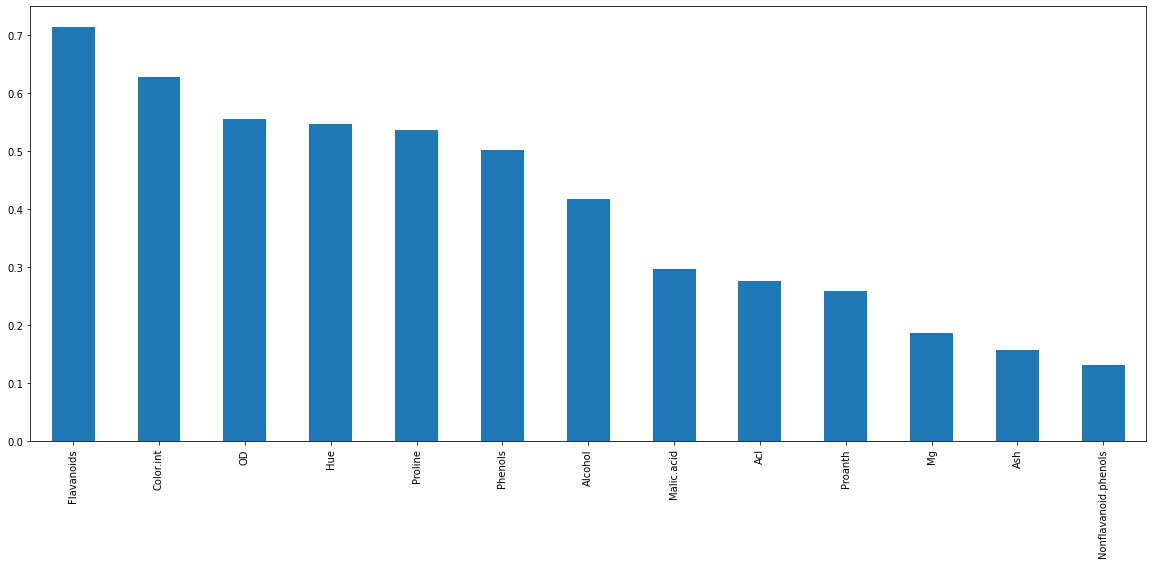

In [41]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [42]:
# to select top 'k' variables
from sklearn.feature_selection import SelectKBest

In [43]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

# Feature Selection-Information gain - mutual information In Regression

In [44]:
house = pd.read_csv('house price.csv')
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [45]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [46]:
#numerical cols

numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(house.select_dtypes(include=numeric_lst).columns)

In [47]:
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [48]:
house=house[numerical_cols]

In [49]:
house=house.drop("Id",axis=1)

In [50]:
### It is always a good practice to split train and test data to avoid
#overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(house.drop(labels=['SalePrice'], axis=1),
    house['SalePrice'],
    test_size=0.3,
    random_state=0)

In [51]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
64            60          NaN     9375            7            5       1997   
682          120          NaN     2887            6            5       1996   
960           20         50.0     7207            5            7       1958   
1384          50         60.0     9060            6            5       1939   
1100          30         60.0     8400            2            5       1920   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
64            1998       573.0         739           0  ...         645   
682           1997         0.0        1003           0  ...         431   
960           2008         0.0         696           0  ...           0   
1384          1950         0.0         204           0  ...         280   
1100          1950         0.0         290           0  ...         246   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
64           576           36              0          0            0   
682          307            0              0          0            0   
960          117            0              0          0            0   
1384           0            0              0          0            0   
1100           0            0              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold  
64           0        0       2    2009  
682          0        0      11    2008  
960          0        0       2    2010  
1384         0        0      10    2009  
1100         0        0       1    2009  

[5 rows x 36 columns]

In [52]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [53]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.25650166, 0.21386486, 0.16675957, 0.52809092, 0.10910068,
       0.34861876, 0.24488012, 0.10149903, 0.16349552, 0.        ,
       0.11152088, 0.38442846, 0.31153444, 0.23115558, 0.00720657,
       0.48187616, 0.02139886, 0.        , 0.26219073, 0.0790001 ,
       0.04230198, 0.02212867, 0.1810691 , 0.18180666, 0.26980256,
       0.37518823, 0.36989495, 0.06626594, 0.17124124, 0.01354041,
       0.0014513 , 0.01508921, 0.01000213, 0.        , 0.        ,
       0.00777286])

In [54]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.528091
GrLivArea        0.481876
TotalBsmtSF      0.384428
GarageCars       0.375188
GarageArea       0.369895
YearBuilt        0.348619
1stFlrSF         0.311534
GarageYrBlt      0.269803
FullBath         0.262191
MSSubClass       0.256502
YearRemodAdd     0.244880
2ndFlrSF         0.231156
LotFrontage      0.213865
Fireplaces       0.181807
TotRmsAbvGrd     0.181069
OpenPorchSF      0.171241
LotArea          0.166760
BsmtFinSF1       0.163496
BsmtUnfSF        0.111521
OverallCond      0.109101
MasVnrArea       0.101499
HalfBath         0.079000
WoodDeckSF       0.066266
BedroomAbvGr     0.042302
KitchenAbvGr     0.022129
BsmtFullBath     0.021399
ScreenPorch      0.015089
EnclosedPorch    0.013540
PoolArea         0.010002
YrSold           0.007773
LowQualFinSF     0.007207
3SsnPorch        0.001451
BsmtFinSF2       0.000000
MoSold           0.000000
MiscVal          0.000000
BsmtHalfBath     0.000000
dtype: float64

<AxesSubplot:>

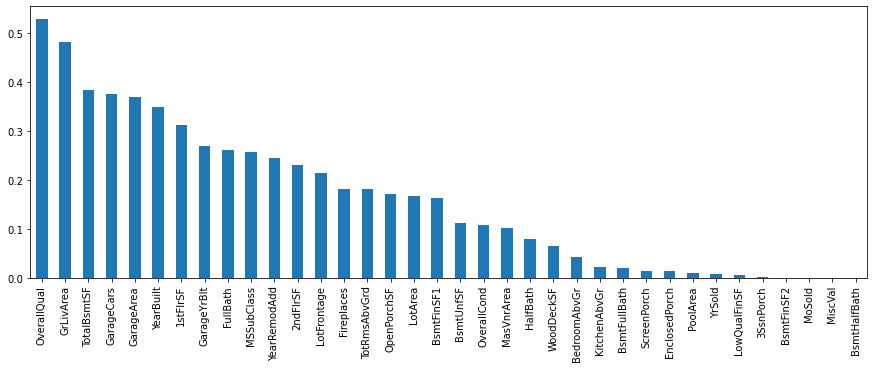

In [55]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [56]:
from sklearn.feature_selection import SelectPercentile

In [57]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x0000021842F51820>)

In [58]:
selected_top_columns.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [59]:
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

# Feature Selection with Fisher Score- Chisquare Test

Compute chi-squared stats between each non-negative feature and class.

    This score should be used to evaluate categorical variables in a classification task.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification. The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

In [61]:
import seaborn as sns
df=sns.load_dataset('titanic')
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [63]:
##['sex','embarked','alone','pclass','Survived']
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

sex embarked  alone  pclass  survived
0    male        S  False       3         0
1  female        C  False       1         1
2  female        S   True       3         1
3  female        S  False       1         1
4    male        S   True       3         0

In [64]:
### Let's perform label encoding on sex column

df['sex']=np.where(df['sex']=="male",1,0)
df.head()

sex embarked  alone  pclass  survived
0    1        S  False       3         0
1    0        C  False       1         1
2    0        S   True       3         1
3    0        S  False       1         1
4    1        S   True       3         0

### Before applying Chisquare test , first apply label encoding to each and evry categorical feature

In [65]:
### let's perform label encoding on embarked

ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)

In [71]:
ordinal_label

{'S': 0, 'C': 1, 'Q': 2, nan: 3}

In [67]:
df.head()

sex  embarked  alone  pclass  survived
0    1         0  False       3         0
1    0         1  False       1         1
2    0         0   True       3         1
3    0         0  False       1         1
4    1         0   True       3         0

<AxesSubplot:>

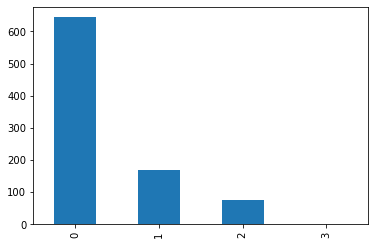

In [70]:
df['embarked'].value_counts().plot.bar()

In [72]:
### let's perform label encoding on alone

df['alone']=np.where(df['alone']==True,1,0)

In [73]:
### train Test split is usually done to avaoid overfitting

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],
                                              df['survived'],test_size=0.3,random_state=100)

In [75]:
X_train.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

In [76]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue

from sklearn.feature_selection import chi2

f_p_values=chi2(X_train,y_train)

In [77]:
f_p_values

(array([65.67929505,  7.55053653, 10.88471585, 21.97994154]),
 array([5.30603805e-16, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06]))

In [78]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

sex         5.306038e-16
embarked    5.999221e-03
alone       9.696105e-04
pclass      2.755149e-06
dtype: float64

In [79]:
p_values.sort_index(ascending=False)

sex         5.306038e-16
pclass      2.755149e-06
embarked    5.999221e-03
alone       9.696105e-04
dtype: float64

From the above we observed that Sex Column is the most important column when compared to the output feature Survived